# AMAT503:  Lecture 10_code

February 8, 2018.

Michael Lamoureux

# HEADS' UP!

I will be using [Jupyter notebooks](https://jupyter.org) in this classroom, to combine text, math, and graphics. 

Students can access Jupyter at [ucalgary.syzygy.ca](https://ucalgary.syzygy.ca)

An eBook on how to use syzygy is here: [intro.syzygy.ca](http://intro.syzygy.ca)

Lecture notes, code, assignments, etc are available on a git repo: [github.com/mlamoureux](https://github.com/mlamoureux)

The textbnook for the course is available electronically
[here](https://ucalgary.summon.serialssolutions.com/#!/#!%2Fsearch%3FbookMark=ePnHCXMwhZ3bCoJAEIYNvCjrGcq6CLoQFMLoNjN6gO4H6QBSWLRrh7fvH2ddC4QuxQ_Fw87-M7v7r-e4yFuPHXFTYoMxiNIYSbV43SxC_EMRdyEeV8mQFIlTMnQJOl9ogW5dIGGvc2RuPcdf52hBkJD-M-PNGLSvvzQdvs3AcfW9RDQdbdJdsg2MheubTAWEeBZXHLHXXiBEs6iByiIveOdjKvcR8YIWZChLhHZ2au87M-EzdUbIQTjSih6XahhT0c_zgR0Lq7ITslyyTPPMYKbC1FGfqkuZaZiUrhLId-gLgEMBZfCYbuI8QVFYjZPy9pmTVkC_dCvULKiyqL2VgbiIcrja03KI5h3PGfr3aj8nd5KS)

or [here](https://proquest-safaribooksonline-com.ezproxy.lib.ucalgary.ca/9780470183113?uicode=ucalgary).
Thanks to Phil for pointing this out. 


One of the links should take any student to the ucalgary login page and then to the web version of the book after they successfully login.

In [7]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from matplotlib.pyplot import *
from IPython.display import IFrame
from IPython.display import Audio, display

## Summary

- Figure out the 2D wavelet transform, data structures
- Animations showing control of wavelet coeffcients
- Haar and Daubechies transforms, different behaviour
- If we have time, cumulative energy function

I'm going to try something **dangerous**, and import pywt (the python wavelet toolkit) without any namespace. Yikes! This is not safe in general, but maybe it is okay for a small notebook.

In [8]:
from pywt import *

In [9]:
# This is an integer array, of a photo of a man with a camera
cam = data.camera()


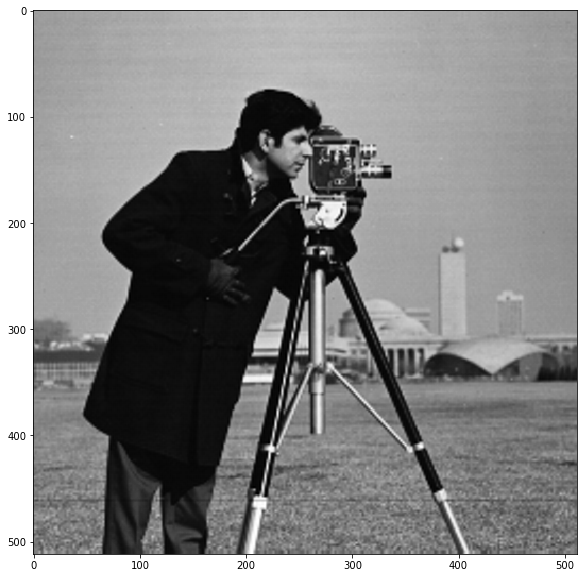

In [10]:
# We can display in grayscale, with a big 10x10 display
figure(figsize=(10, 10))
# figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
imshow(cam,cmap='gray')


In [11]:
# Do the wavelet decon
coeffs = wavedecn(cam, wavelet='db1', level=3)

In [12]:
# Check the size of this data structuresize(coeffs)
size(coeffs)


4

In [13]:
coeffs[0]

array([[ 1253.5  ,  1261.375,  1259.   , ...,  1234.25 ,  1239.   ,
         1220.375],
       [ 1245.5  ,  1245.875,  1244.375, ...,  1213.625,  1201.125,  1199.   ],
       [ 1242.5  ,  1255.875,  1267.   , ...,  1216.5  ,  1208.375,
         1204.875],
       ..., 
       [  923.875,   913.625,  1055.125, ...,   903.375,   897.5  ,
          949.625],
       [  926.75 ,   959.75 ,   983.375, ...,   843.125,   928.375,
          855.625],
       [  984.75 ,  1052.125,  1031.   , ...,   885.5  ,   898.   ,
          989.125]])

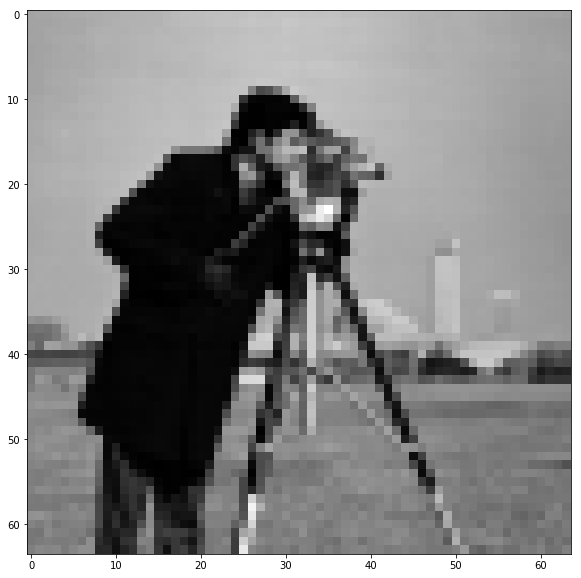

In [14]:
# We  display the first coeffs[0] in grayscale
figure(figsize=(10, 10))
imshow(coeffs[0],cmap='gray')


In [15]:
# next component
coeffs[1]

{'ad': array([[   2.5  ,   -0.625,    2.5  , ...,   -5.5  ,    0.5  ,    0.125],
        [  -5.5  ,    1.625,    7.125, ...,    4.375,   11.625,   -2.75 ],
        [  -5.25 ,   -1.375,   -1.25 , ...,    2.5  ,    0.875,   -1.125],
        ..., 
        [  47.625,  -72.875,  -14.625, ...,   -7.875,    1.   ,   25.625],
        [  40.5  ,   42.5  ,   -7.625, ...,  -31.375,   -4.625,   15.875],
        [  -6.5  ,  -12.625,  112.25 , ...,   -8.75 ,  -71.75 ,   30.375]]),
 'da': array([[  1.50000000e+00,  -1.25000000e-01,  -4.01900735e-14, ...,
           1.00000000e+00,  -5.00000000e-01,  -1.87500000e+00],
        [ -1.25000000e+00,   2.37500000e+00,  -4.62500000e+00, ...,
           7.62500000e+00,   4.37500000e+00,   7.25000000e+00],
        [  5.50000000e+00,   1.06250000e+01,   6.25000000e+00, ...,
          -7.25000000e+00,  -7.12500000e+00,  -1.08750000e+01],
        ..., 
        [  3.36250000e+01,  -1.93750000e+01,   7.63750000e+01, ...,
          -5.83750000e+01,  -4.10000000e+01,

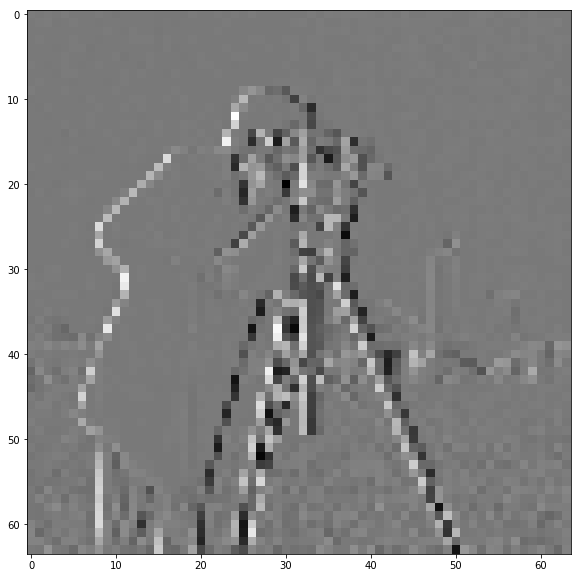

In [16]:
# coeffs[1] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[1]['ad'],cmap='gray')

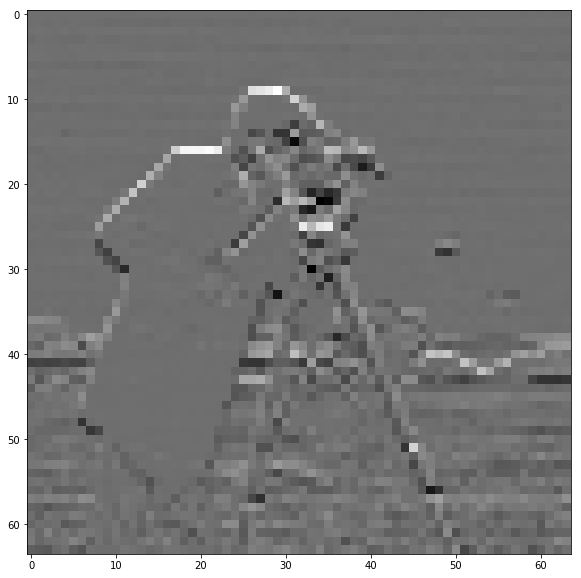

In [17]:
figure(figsize=(10, 10))
imshow(coeffs[1]['da'],cmap='gray')

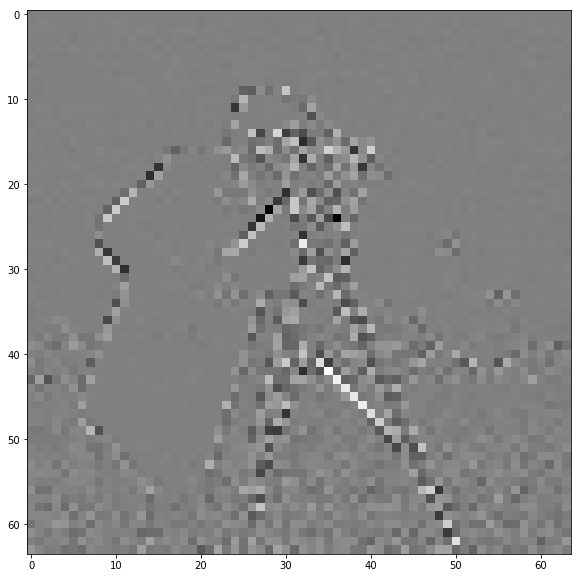

In [18]:
figure(figsize=(10, 10))
imshow(coeffs[1]['dd'],cmap='gray')

In [19]:
# next component
coeffs[2]

{'ad': array([[   0.5 ,    1.  ,   -0.25, ...,    3.  ,    2.25,    0.75],
        [   2.5 ,    2.5 ,   -1.5 , ...,    2.5 ,    1.75,    0.5 ],
        [   3.5 ,   -4.25,    1.75, ...,    8.25,   -5.5 ,   -2.25],
        ..., 
        [ -11.75,   16.  ,    3.5 , ...,  -12.25,  -22.  ,   -1.75],
        [  -6.  ,   36.  ,  -75.5 , ...,  -26.5 ,  -14.  ,   23.  ],
        [ -10.75,   -4.75, -103.  , ...,   16.75,  -19.  ,   29.25]]),
 'da': array([[  2.50000000e+00,  -1.50000000e+00,  -2.25000000e+00, ...,
          -1.00000000e+00,  -4.75000000e+00,  -1.75000000e+00],
        [  1.50000000e+00,  -1.00000000e+00,  -1.50000000e+00, ...,
           2.01505479e-14,  -2.75000000e+00,  -1.00000000e+00],
        [  2.02060590e-14,   2.25000000e+00,   1.25000000e+00, ...,
           9.25000000e+00,   1.05000000e+01,   1.25000000e+00],
        ..., 
        [  2.27500000e+01,   2.10000000e+01,   1.30000000e+01, ...,
           5.22500000e+01,  -1.45000000e+01,  -2.72500000e+01],
        [ -1.550

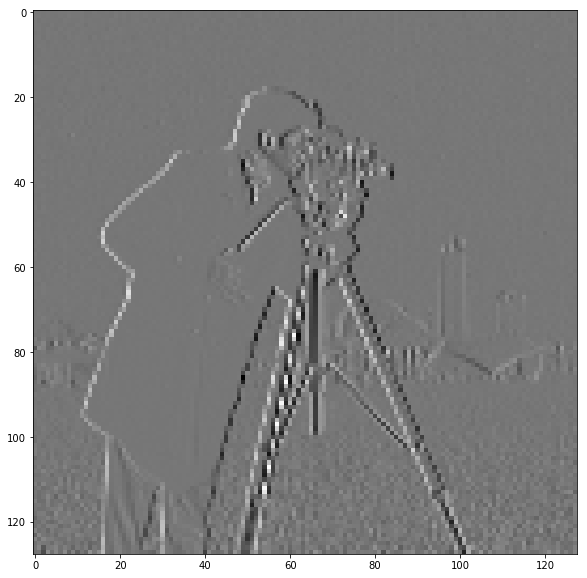

In [20]:
# coeffs[2] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[2]['ad'],cmap='gray')

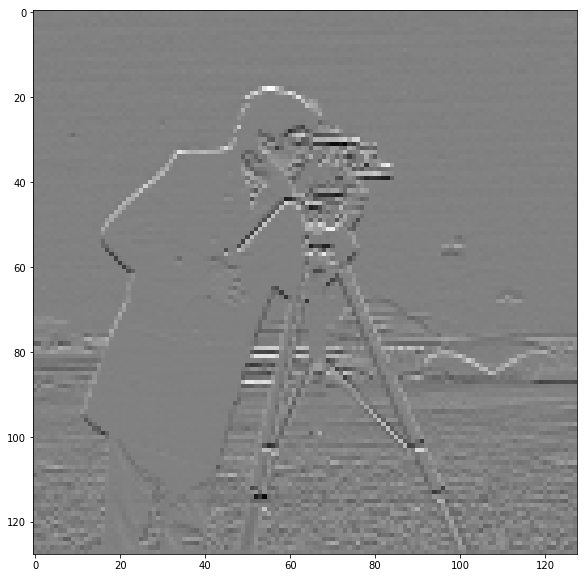

In [21]:
# coeffs[2] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[2]['da'],cmap='gray')

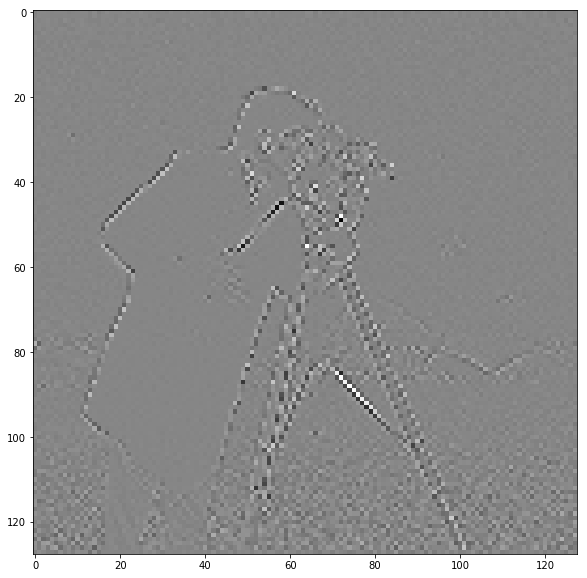

In [22]:
# coeffs[2] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[2]['dd'],cmap='gray')

In [23]:
coeffs[3]

{'ad': array([[ -1.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
           1.00000000e+00,  -1.00000000e+00,   0.00000000e+00],
        [  2.00000000e+00,   0.00000000e+00,  -5.00000000e-01, ...,
           5.00000000e-01,   1.50000000e+00,   0.00000000e+00],
        [  2.84217094e-14,   0.00000000e+00,   2.00000000e+00, ...,
           0.00000000e+00,  -5.00000000e-01,   0.00000000e+00],
        ..., 
        [ -6.00000000e+00,   1.50000000e+00,   1.00000000e+01, ...,
          -1.00000000e+00,   1.05000000e+01,   2.50000000e+00],
        [ -4.50000000e+00,   1.00000000e+00,  -1.10000000e+01, ...,
          -5.00000000e-01,   1.00000000e+01,   2.50000000e+00],
        [ -2.00000000e+00,   0.00000000e+00,  -2.05000000e+01, ...,
           0.00000000e+00,   9.00000000e+00,   2.00000000e+00]]),
 'da': array([[  0. ,   1. ,   0. , ...,   0. ,   0. ,   0. ],
        [ -1. ,   2. ,   0.5, ...,  -1.5,  -1.5,   0. ],
        [  1. ,  -3. ,  -1. , ...,   1. ,   0.5,  -1. ],
        .

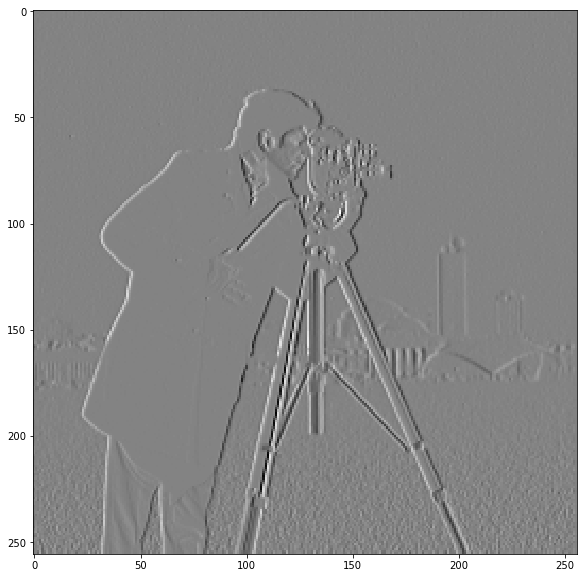

In [24]:
# coeffs[3] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[3]['ad'],cmap='gray')

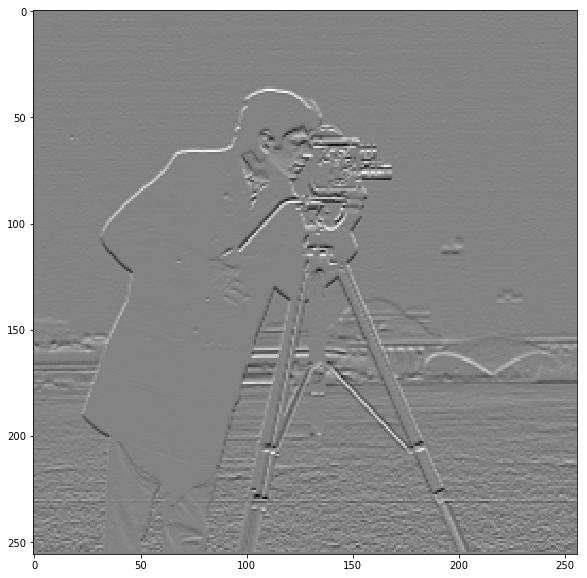

In [25]:
# coeffs[3] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[3]['da'],cmap='gray')

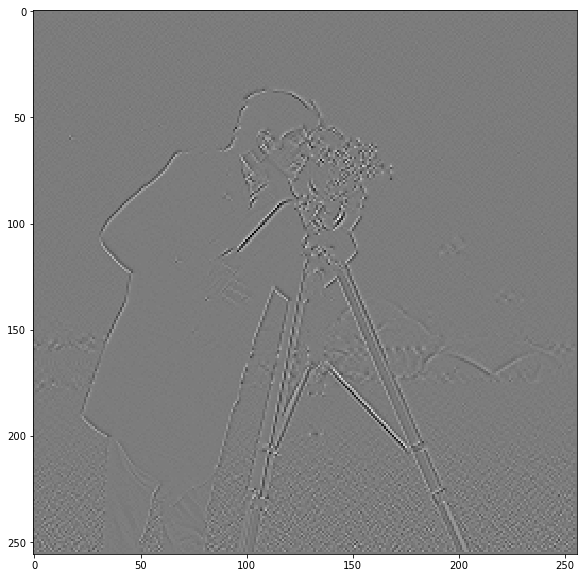

In [26]:
# coeffs[3] has three parts. Let's plot them all
figure(figsize=(10, 10))
imshow(coeffs[3]['dd'],cmap='gray')

## Nice display

Let's organize all these wavelet coefficients into a nice recursive display. Note the blocks are of different sizes, all powers of two. The further down the levels we go, the smaller the blocks get. 

Original image was 512x512

First level has three big blocks of size 256x256

Second level has three smaller blocks of size 128x128

Thrid level has three small blocks of size 64x64

Of course, we could go down into further levels if we set the 'level' parameter appropriately in the function call.

Notice I tried to normalize the scales of each subarray, but I messed up. Maybe you can think of a better way. 


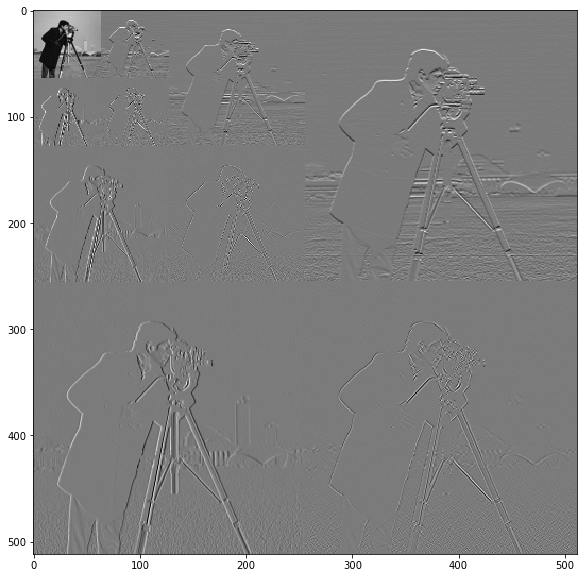

In [27]:
camdec = zeros(shape(cam))

camdec[0:64,0:64] = (coeffs[0]-average(coeffs[0]))/(amax(coeffs[0])-amin(coeffs[0]))

camdec[64:128,0:64] = (coeffs[1]['ad'] - average(coeffs[1]['ad']))/(amax(coeffs[1]['ad'])-amin(coeffs[1]['ad']))
camdec[0:64,64:128] = (coeffs[1]['da'] - average(coeffs[1]['da']))/(amax(coeffs[1]['da'])-amin(coeffs[1]['da']))
camdec[64:128,64:128] = (coeffs[1]['dd'] - average(coeffs[1]['dd']))/(amax(coeffs[1]['dd'])-amin(coeffs[1]['dd']))

camdec[128:256,0:128] = (coeffs[2]['ad'] - average(coeffs[2]['ad']))/(amax(coeffs[2]['ad'])-amin(coeffs[2]['ad']))
camdec[0:128,128:256] = (coeffs[2]['da'] - average(coeffs[2]['da']))/(amax(coeffs[2]['da'])-amin(coeffs[2]['da']))
camdec[128:256,128:256] = (coeffs[2]['dd'] - average(coeffs[2]['dd']))/(amax(coeffs[2]['dd'])-amin(coeffs[2]['dd']))

camdec[256:512,0:256] = (coeffs[3]['ad'] - average(coeffs[3]['ad']))/(amax(coeffs[3]['ad'])-amin(coeffs[3]['ad']))
camdec[0:256,256:512] = (coeffs[3]['da'] - average(coeffs[3]['da']))/(amax(coeffs[3]['da'])-amin(coeffs[3]['da']))
camdec[256:512,256:512] = (coeffs[3]['dd'] - average(coeffs[3]['dd']))/(amax(coeffs[3]['dd'])-amin(coeffs[3]['dd']))


figure(figsize=(10, 10))
imshow(camdec,cmap='gray')

## A better normalization?





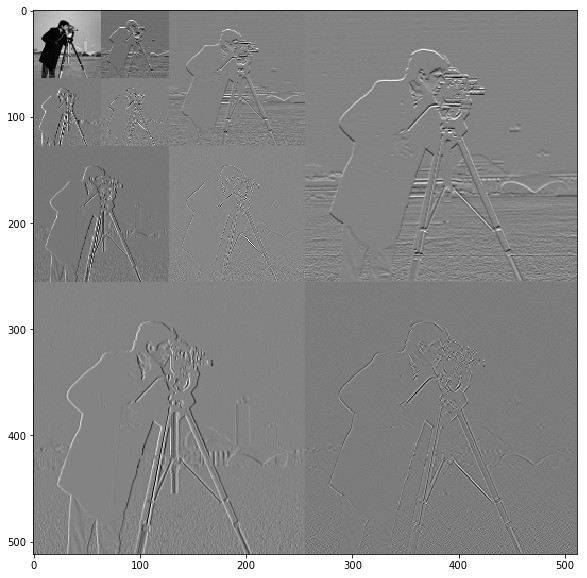

In [28]:
camdec = zeros(shape(cam))

camdec[0:64,0:64] = (coeffs[0]-amin(coeffs[0]))/(amax(coeffs[0])-amin(coeffs[0]))

camdec[64:128,0:64] = (coeffs[1]['ad'] - amin(coeffs[1]['ad']))/(amax(coeffs[1]['ad'])-amin(coeffs[1]['ad']))
camdec[0:64,64:128] = (coeffs[1]['da'] - amin(coeffs[1]['da']))/(amax(coeffs[1]['da'])-amin(coeffs[1]['da']))
camdec[64:128,64:128] = (coeffs[1]['dd'] - amin(coeffs[1]['dd']))/(amax(coeffs[1]['dd'])-amin(coeffs[1]['dd']))

camdec[128:256,0:128] = (coeffs[2]['ad'] - amin(coeffs[2]['ad']))/(amax(coeffs[2]['ad'])-amin(coeffs[2]['ad']))
camdec[0:128,128:256] = (coeffs[2]['da'] - amin(coeffs[2]['da']))/(amax(coeffs[2]['da'])-amin(coeffs[2]['da']))
camdec[128:256,128:256] = (coeffs[2]['dd'] - amin(coeffs[2]['dd']))/(amax(coeffs[2]['dd'])-amin(coeffs[2]['dd']))

camdec[256:512,0:256] = (coeffs[3]['ad'] - amin(coeffs[3]['ad']))/(amax(coeffs[3]['ad'])-amin(coeffs[3]['ad']))
camdec[0:256,256:512] = (coeffs[3]['da'] - amin(coeffs[3]['da']))/(amax(coeffs[3]['da'])-amin(coeffs[3]['da']))
camdec[256:512,256:512] = (coeffs[3]['dd'] - amin(coeffs[3]['dd']))/(amax(coeffs[3]['dd'])-amin(coeffs[3]['dd']))


figure(figsize=(10, 10))
imshow(camdec,cmap='gray')

##  Test.

Can we do a little interactive widget? Here is a test we grabbed off the web.

In [31]:
from ipywidgets import interactive

def f(m, b):
    figure(2)
    x = linspace(-10, 10, num=1000)
    plot(x, m * x + b)
    ylim(-5, 5)
    show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

Let try out something with a 1D signal

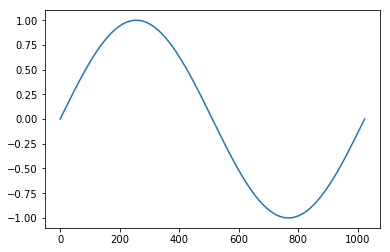

In [32]:
## Here is a real signal
Fs = 1024 # the sampling rate
t = linspace(0,1,Fs)  # time samples
x = sin(2*pi*t) 
plot(x)

Let's try keeping coefficent number 6, since that was the biggest one of all the ones we threw out last time.

In [34]:
## Decomposition
coeffs_raw = wavedec(x, 'db1')
coeffs_muck = wavedec(x, 'db1')

## Reconstruction
y = waverec(coeffs_raw, 'db1')

def myf(c0, c1):
    figure(2)
    coeffs_muck[0] = c0*coeffs_raw[0]
    coeffs_muck[1] = c1*coeffs_raw[1]
    y = waverec(coeffs_muck, 'db1')
    plot(t,y)
    ylim(-1, 1)
    show()

interactive_plot2 = interactive(myf, c0=(0.0, 2.0), c1=(0.0, 2.0))
output = interactive_plot2.children[-1]
output.layout.height = '310px'
interactive_plot2

Okay, let's do better.

In [36]:
## Decomposition
coeffs_raw = wavedec(x, 'db1')
coeffs_muck = wavedec(x, 'db1')

## Reconstruction
y = waverec(coeffs_raw, 'db1')

def myf(c0, c1, c2, c3, c4, c5, c6):
    figure(2)
    coeffs_muck[0] = c0*coeffs_raw[0]
    coeffs_muck[1] = c1*coeffs_raw[1]
    coeffs_muck[2] = c2*coeffs_raw[2]
    coeffs_muck[3] = c3*coeffs_raw[3]
    coeffs_muck[4] = c4*coeffs_raw[4]
    coeffs_muck[5] = c5*coeffs_raw[5]
    coeffs_muck[6] = c6*coeffs_raw[6]
    y = waverec(coeffs_muck, 'db1')
    plot(t,y)
    ylim(-1, 1)
    show()

interactive_plot2 = interactive(myf, c0=(0.0, 2.0), c1=(0.0, 2.0),c2=(0.0, 2.0),c3=(0.0, 2.0),c4=(0.0, 2.0),c5=(0.0, 2.0),c6=(0.0, 2.0))


output = interactive_plot2.children[-1]
output.layout.height = '320px'
interactive_plot2

## Cool stuff

Let's look at all the wavelet families we have. Stick this into the animation.

In [38]:
## Decomposition
coeffs_raw = wavedec(x, 'db1')
coeffs_muck = wavedec(x, 'db1')

## Reconstruction
y = waverec(coeffs_raw, 'db1')

def myf(c0, c1, c2, c3, c4, c5, c6, w):
    figure(2)
    coeffs_raw = wavedec(x, w)
    coeffs_muck = wavedec(x, w)
    coeffs_muck[0] = c0*coeffs_raw[0]
    coeffs_muck[1] = c1*coeffs_raw[1]
    coeffs_muck[2] = c2*coeffs_raw[2]
    coeffs_muck[3] = c3*coeffs_raw[3]
    coeffs_muck[4] = c4*coeffs_raw[4]
    coeffs_muck[5] = c5*coeffs_raw[5]
    coeffs_muck[6] = c6*coeffs_raw[6]
    y = waverec(coeffs_muck, w)
    plot(t,y)
    ylim(-1, 1)
    show()

interactive_plot2 = interactive(myf, c0=(0.0, 2.0), c1=(0.0, 2.0),c2=(0.0, 2.0),c3=(0.0, 2.0),c4=(0.0, 2.0),c5=(0.0, 2.0),c6=(0.0, 2.0), w=['db1','db2','db3','db4'])


output = interactive_plot2.children[-1]
output.layout.height = '340px'
interactive_plot2

# Image animation

Can I do a wavelet animation using the an image?

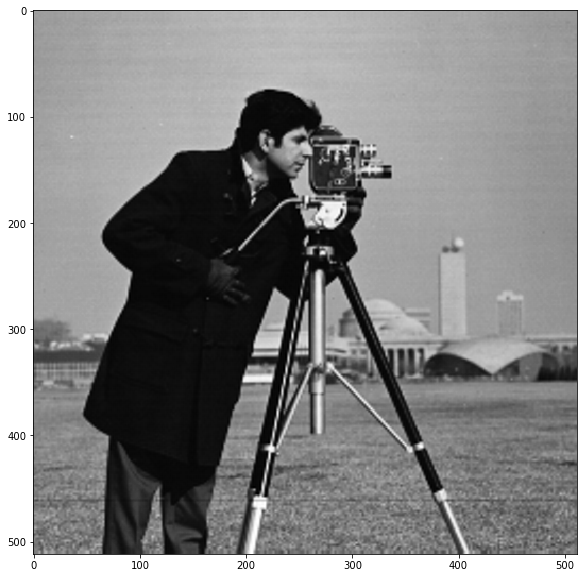

In [39]:
# This is an integer array, of a photo of a man with a camera
cam = data.camera()
coeffs_raw = wavedecn(cam, wavelet='db1', level=3)
coeffs_muck = wavedecn(cam, wavelet='db1', level=3)
cam_recon = waverecn(coeffs_muck, wavelet='db1')

figure(figsize=(10, 10))
imshow(cam_recon,cmap='gray')

In [42]:
cam = data.camera()

def myf3(c0, c1ad, c1da, c1dd, c2ad, c2da, c2dd, w):
    figure(2)
    coeffs_raw = wavedecn(cam, wavelet=w, level=3)
    coeffs_muck = wavedecn(cam, wavelet=w, level=3)
    coeffs_muck[0] = c0*coeffs_raw[0]
    coeffs_muck[1]['ad'] = c1ad*coeffs_raw[1]['ad']
    coeffs_muck[1]['da'] = c1da*coeffs_raw[1]['da']
    coeffs_muck[1]['dd'] = c1dd*coeffs_raw[1]['dd']
    coeffs_muck[2]['ad'] = c2ad*coeffs_raw[2]['ad']
    coeffs_muck[2]['da'] = c2da*coeffs_raw[2]['da']
    coeffs_muck[2]['dd'] = c2dd*coeffs_raw[2]['dd']
    cam_recon = waverecn(coeffs_muck, wavelet=w)
    figure(figsize=(10, 10))
    imshow(cam_recon,cmap='gray')
    show()

interactive_plot3 = interactive(myf3, c0=(0.0, 2.0), c1ad=(0.0, 2.0),c1da=(0.0, 2.0),c1dd=(0.0, 2.0),c2ad=(0.0, 2.0),c2da=(0.0, 2.0),c2dd=(0.0, 2.0), w=['db1','db2','db3','db4'])


output = interactive_plot3.children[-1]
output.layout.height = '340px'
interactive_plot3